In [1]:
from primitives.primitives import *
from cirq import Circuit, LineQid, measure, sample
from scipy.linalg import expm
import matplotlib.pyplot as plt

## t-V model definition

One-dimensional spinless t-V model (range=1):

$H = -t \sum_{i=1}^{L} \left( c_i^\dagger c_{i+1} + h.c.\right) + V \sum_{i=1}^L n_i n_{i+1}$

In the 2D case we have to define horizontal and vertical hopping operators.

### Horizontal hopping operators

$H_x^{hop} (i, i+1) = i \Gamma^1_{i} \Gamma^2_{i+1} \left(\tilde \Gamma_i -\tilde\Gamma_{i+1}\right)$

In [2]:
x_hop_matrix = 1j * TensorProduct(sy_gamma_1 * sy_gamma_5, sy_gamma_2) - 1j * TensorProduct(sy_gamma_1, sy_gamma_2 * sy_gamma_5)
class HopXGate(Gate):
    """Horizontal hopping gate."""
    def _qid_shape_(self):
        return (4, 4)
    def _unitary_(self):
        return np.array(x_hop_matrix)
    def _circuit_diagram_info_(self, args):
        return ["H_x(r)", "H_x(r+1)"]
x_hop_matrix

Matrix([
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0, -2.0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0, 2.0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0, 2.0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0, -2.0,   0, 0],
[0,    0, 2.0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0, -2.0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0,    0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,   0, 0,   0, 0, 0, -2.0,   0, 0, 0,    0, 0,    0,   0, 0],
[0,    0,  

### Vertical hopping operators

$H_y^{hop} (i, i+1) = i \Gamma^3_{i} \Gamma^4_{i+1} \left(\tilde \Gamma_i -\tilde\Gamma_{i+1}\right)$

In [3]:
y_hop_matrix = 1j * TensorProduct(sy_gamma_3 * sy_gamma_5, sy_gamma_4) - 1j * TensorProduct(sy_gamma_3, sy_gamma_4 * sy_gamma_5)
class HopYGate(Gate):
    """Vertical hopping gate."""
    def _qid_shape_(self):
        return (4, 4)
    def _unitary_(self):
        return np.array(y_hop_matrix)
    def _circuit_diagram_info_(self, args):
        return ["H_y(r)", "H_y(r+1)"]
y_hop_matrix

Matrix([
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0, 2.0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0, 2.0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0, 2.0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0, 2.0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0, -2.0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0, -2.0, 0],
[0,   0,   0, 0,   0, 0, 0,   0,    0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   0, 0,   0, 0, 0,   0, -2.0, 0, 0,    0, 0,    0,    0, 0],
[0,   0,   

### Number operator

$n_i = \frac{1}{2} - \frac{1}{2}\tilde \Gamma_i$

In [4]:
number_matrix = 0.5 * sy_id - 0.5 * sy_gamma_5
class NumberGate(Gate):
    """Number gate."""
    def _qid_shape_(self):
        return (4,)
    def _unitary_(self):
        return np.array(number_matrix)
    def _circuit_diagram_info_(self, args):
        return ["n(r)"]
number_matrix

Matrix([
[0,   0,   0, 0],
[0, 1.0,   0, 0],
[0,   0, 1.0, 0],
[0,   0,   0, 0]])

### Evolution gates

In [5]:
def evolve_gate(gate):
    class evolved(Gate):
        def __init__(self, C=1, t=0.1):
            self.C = C  # coefficient
            self.t = t  # evolution time
            self.matrix = expm(np.array(-1j * self.t * self.C * gate()._unitary_(), dtype=np.complex128))
            super()
        def _qid_shape_(self):
            return gate()._qid_shape_()
        def _circuit_diagram_info_(self, args):
            return gate()._circuit_diagram_info_(args)
        def _unitary_(self):
            return self.matrix
    return evolved

# example:
evolution_hopping = evolve_gate(HopYGate)(C = 1, t = 0.5)

## Evolving a state

In [6]:
def evolve(qubits, temps, initial=None, t=1, V=0, exact=False, shots=10):

    if initial is None:
        initial = []
    
    if V != 0:
        evolution_number = evolve_gate(NumberGate)(t = temps[1]-temps[0])
        
    evolution_horizontal_hop = evolve_gate(HopXGate)(C=t, t = temps[1]-temps[0])
    evolution_vertical_hop = evolve_gate(HopYGate)(C=t, t = temps[1]-temps[0])

    results = []
    
    evolution_circuit = []
    for idx, t in enumerate(temps):

        # on site part
        if V != 0:
            for qubit in qubits.flatten():
                evolution_circuit.append(evolution_number(qubit))

        rows, columns = qubits.shape
        for r_idx, row in enumerate(qubits):
            for q_idx, qubit in enumerate(row):
                # horizontal hopping
                qubit_2 = row[0] if q_idx == columns-1 else row[q_idx+1]
                evolution_circuit.append(evolution_horizontal_hop(qubit, qubit_2))
                # vertical hopping
                qubit_2 = qubits[0][q_idx] if r_idx == rows-1 else qubits[r_idx+1][q_idx]
                evolution_circuit.append(evolution_vertical_hop(qubit, qubit_2))
                    
        if not exact:
            measures = [measure(qubit, key=f"q{idx}") for idx, qubit in enumerate(qubits.flatten())]
            circuit = Circuit([*initial, *evolution_circuit, *measures])
            results.append((circuit, sample(circuit, repetitions=shots)))
            
    return results

## Evolving a 4x2 lattice

In [7]:
rows = 2
columns = 4

qubits = np.array(LineQid.range(rows * columns, dimension=4)).reshape(rows, columns)
temps = np.arange(0, 2, 0.1)
initial_circuit = None

# random initial circuit
initial_circuit = [
    X_P_ij(0, 1)(qubits[0][0]),   # put qudit (0,0) in state 1
    X_P_ij(0, 1)(qubits[1][0]),   # put qudit (1,0) in state 1
    X_P_ij(0, 2)(qubits[0][1]),   # put qudit (0,1) in state 2
]

# results is a list of tuples, every tuple contains the circuit and the result shots
results = evolve(qubits, temps, initial_circuit, shots=10)

Text(0, 0.5, 'Number of operators (not decomposed)')

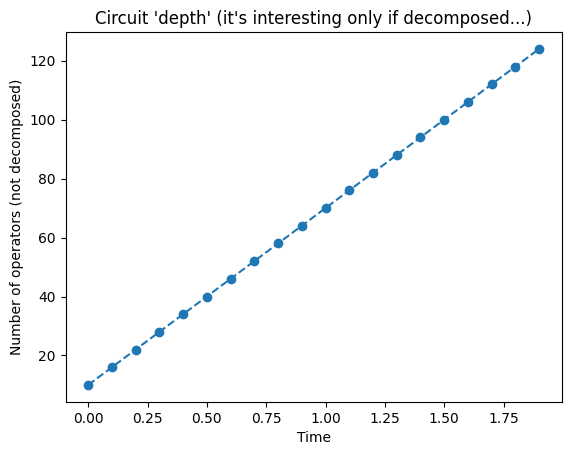

In [8]:
plt.plot(temps, [len(res[0]) for res in results], "o--")

plt.title("Circuit 'depth' (it's interesting only if decomposed...)")

plt.xlabel("Time")
plt.ylabel("Number of operators (not decomposed)")

In [9]:
results[-1][0]

┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐   ┌────────────────┐              ┌───────────────────────┐   ┌───────────────┐
0 (d=4): ───X(3.14)_01───H_x(r)──────H_y(r)────────────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)───────────────────────H_y(r)────────────────────────────────────H_x(r+1)─────────────H_y(r+1)────────────────H_x(r)─────────

In [10]:
results[-1][1]

q0=0313313321
q1=0200220000
q2=3222002202
q3=0002202200
q4=2311111103
q5=2200000002
q6=1000000020
q7=0000000020